<a href="https://colab.research.google.com/github/vinayprabhu/Network_Science_Meets_Deep_Learning/blob/master/1_MNIST_C_Elegans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prelude to the notebook series:  Network Science meets Deep Learning.

<img src="https://docs.google.com/uc?id=1NVgkb-ekAfNH170S78VDY4HAGpm511Uw" alt="alt text" width="720"/>

This is the first notebook in a series of notebooks showcasing success stories at the intersection of Network Sciences and Deep Learning.
My main partner in crime is [Nick](https://www.linkedin.com/in/nick11roberts/) [Roberts](http://nick11roberts.github.io/), a recent Computer Science grad from UCSD and an incoming MS student at CMU.

I will be covering topics spanning:

1.   Complex Networks
2.   Spectral Graph Theory, especially, Ramanujan Graphs
3.   Architectures design for Deep Neural Networks (RogueNets / Ramanujan-nets)







# Background: Complex Networks and Deep Neural network topology

I indulged in Network Sciences during my doctoral [work](https://kilthub.cmu.edu/articles/Network_Aided_Classification_and_Detection_of_Data/7430012)  and the Network Scientific community was grappling with the question if * brain networks had
small-world topology*.

On the supporting side, the [claims](https://www.sciencedirect.com/science/article/pii/S0149763416307849) were:

1: Human brain structural and functional networks follow small-world configuration. 2: Small-world model quantifies efficient information segregation and integration. 3:  Small-world model captures individual cognition and exhibits physiological basis. 4: Small-world brain networks show dramatic changes with development, aging and disease. 5: Small-world brain models promote the design of brain-like devices in engineering.


There were also [proposals](https://www.sciencedirect.com/science/article/pii/S1053811916306152) that: 1: The human brain can be represented as a multi-scale network 2: Characterizing the architecture of multi-scale networks requires new tools.

While there were skeptics (Read '*[Beware of the Small-world neuroscientist!](https://arxiv.org/ftp/arxiv/papers/1603/1603.00200.pdf)*') about the specifics of the topological recipe used to characterize the brain networks, there was reasonable consensus that topology was at the heart of explaining intelligence.
How our fantastic brains' 86 billion neurons were interconnected **DID** play an important role in the emergent intelligence. One of my favorite researchers in this field is [Dr.Bassett](https://scholar.google.com/citations?user=siYpAPsAAAAJ&hl=en) whose work at the intersection of Complex networks, functional connectivity modeling, brain architectures and 
health-and-schizophrenia has shown striking evidence of the *topology story*.

When I did encounter the stunning efficacy of Deep Neural Networks and all the bruhaha about the *biological inspiredness* they pack (*insert eyeroll here*), it was rather shocking that no heed was being paid to the topology story.

## Fun fact:

In fact, I had the chance to ask Dr. Yoshua Bengio back in 2016 about this and his precise response (at 10:05:31) is ' ***.. because maybe the hub story is not important***'

<img src="https://docs.google.com/uc?id=1XtypbpHDST1mfKWdqmx_gKmZCNPx9A0n" alt="alt text" width="640"/>


Video link: https://www.youtube.com/watch?v=9dXiAecyJrY&t=604m50s







# Quest for the neuron/node model:

If the deep neural networks are to adhere to a complex graph topology, what would the neurons constitute? I had initially thought a good starting point was the ResNet module (will cover this in the forthcoming notebook). Nick and I tried it out and it did give us decent results. In particular, our RogueNet34 deep neural network achieved 89.410% test accuracy on CIFAR-10 while an analogous architecture, ResNet34, trained with an identical training procedure on the same dataset achieved 88.000% test accuracy. 


However, two weeks back, reserachers at FAIR came up with a real nifty model, that I absolutely loved!
<img src="https://docs.google.com/uc?id=1_lzmknCTvFLLkz6huhxIMt0dZXLKFTz5" alt="alt text" width="480"/>

Paper link: [https://arxiv.org/pdf/1904.01569v2.pdf](https://arxiv.org/pdf/1904.01569v2.pdf )

The first question that came to my mind was: Could we just harness real-world neuronal network topologies and see if we can train the resultant neural networks on some standard datasets?

In this notebook, we showcase how we train a deep network whose *particiapnt* graph topology is extracted from the neuronal network of a nematode worm to *conquer* the MNIST dataset! :D




#  MNIST classification using the neuronal network of Caenorhabditis elegans

![picture](https://cbs.umn.edu/sites/cbs.umn.edu/files/public/images/WORMa.jpg)

##  Caenorhabditis elegans


> is the wormy half of the rock-star duo *'D.melanogaster and C. elegans* that you might know from hits such as :
 '[Comparison of D. melanogaster and C. elegans developmental stages, tissues, and cells by modENCODE RNA-seq data](https://genome.cshlp.org/content/24/7/1086.full.html)' and '[Drosophila and Caenorhabditis elegans as Discovery Platforms for Genes Involved in Human Alcohol Use Disorder](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4656040/)'


One of the best introductory resource on knowing more about this cheeky little nematode  can be found [here](https://cbs.umn.edu/cgc/what-c-elegans)

I first encountered this cheeky little nematode by means of a course I took back in 2011 	
[*18-799 H Adv. Topics in Signal Processing: Network Science: Modeling and inference*](https://users.ece.cmu.edu/~moura/bioandteach.html#18799) taught by my eventual head of doctoral committee,  [Prof.Jose Moura.](https://users.ece.cmu.edu/~moura/)

It's neuronal network is widely touted as the poster-child example of a biological *small-world network* , although that status has recently come into [question](https://www.nature.com/articles/srep22057.pdf) recently. Being more specific, this is the neuronal graph that represents the total number of synaptic and gap junction connections between it's ~ 300 neurons.
While there are different variants of the neuronal network of this nematode (See [this](http://wormwiring.org/series/)), we chose the *classic* [variant](https://www.cise.ufl.edu/research/sparse/matrices/Newman/celegansneural.html) widely used in Network Science literature with 297 nodes and 2148 edges.

Let's download the data and visualize the graph:

## Downloading and visualizing the connectome of Caenorhabditis elegans

In [0]:
! wget https://www.cise.ufl.edu/research/sparse/MM/Newman/celegansneural.tar.gz
! tar -xvzf celegansneural.tar.gz

--2019-04-24 23:29:32--  https://www.cise.ufl.edu/research/sparse/MM/Newman/celegansneural.tar.gz
Resolving www.cise.ufl.edu (www.cise.ufl.edu)... 128.227.36.46
Connecting to www.cise.ufl.edu (www.cise.ufl.edu)|128.227.36.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9007 (8.8K) [application/x-gzip]
Saving to: ‘celegansneural.tar.gz.2’

celegansneural.tar. 100%[===================>]   8.80K  --.-KB/s    in 0s      

2019-04-24 23:29:32 (128 MB/s) - ‘celegansneural.tar.gz.2’ saved [9007/9007]

celegansneural/celegansneural.mtx
celegansneural/celegansneural_nodename.txt


Great! Now that we've downloaded the data, let's take a look at the adjacency matrix... 

In [0]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import networkx as nx

celegans = scipy.io.mmread('celegansneural/celegansneural.mtx').toarray()
celegans

array([[0, 1, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## The adjacency matrix of Caenorhabditis elegans

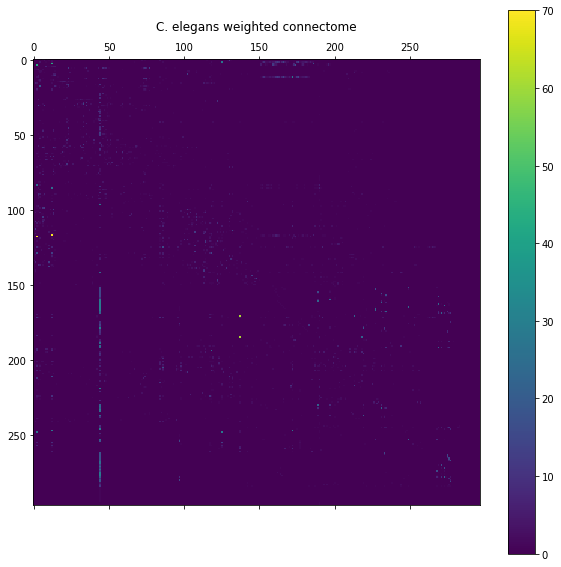

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(celegans, interpolation='nearest')
fig.colorbar(cax)
plt.title('C. elegans weighted connectome');

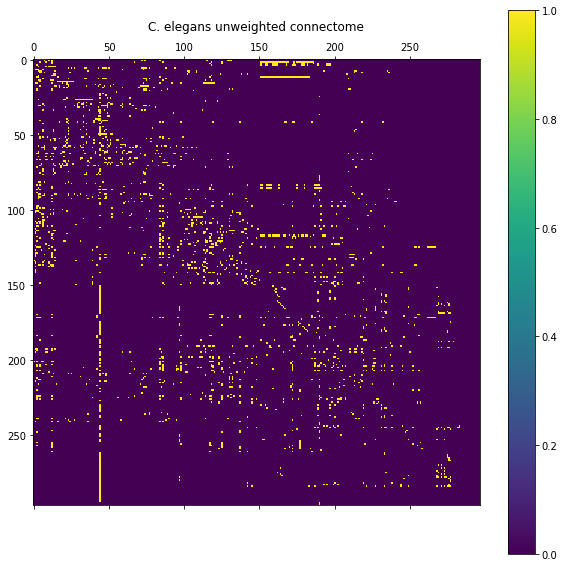

In [0]:
vfunc = np.vectorize(lambda a : 1 if a != 0 else 0)
celegansbin = vfunc(celegans)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(celegansbin, interpolation='nearest')
fig.colorbar(cax)
plt.title('C. elegans unweighted connectome');

Yep, that's an adjacency matrix. Now let's visualize the graph topology... 

## The graph topology of Caenorhabditis elegans




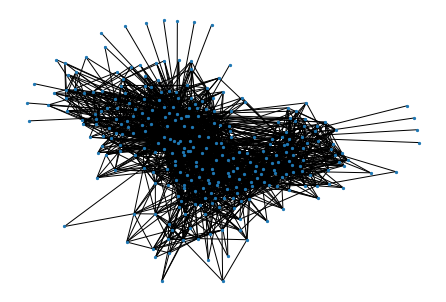

In [0]:
celegans_g = nx.from_numpy_array(celegansbin)
nx.draw(celegans_g, node_size=5)

Now that we know what the connectome of C. elegans looks like, let's verify some of the most basic properties of the graph. 

In [0]:
celegans_g.number_of_edges()

2148

In [0]:
celegans_g.number_of_nodes()

297

## Details of the C. elegans deep neural network

Now that we have a real world network that we're happy with, let's see if we can turn this into a deep-net. 

There are now at least a few implementations of Exploring Randomly Wired Neural Networks for Image Recognition on GitHub, so we proceed by using the unweighted C. elegans connectome as a drop in replacement for the random graphs used by FAIR. Additionally, in their paper, Xie et al. used a series of three consecutive modules each consisting of a differently wired random graph. Instead, we use only one such module containing the C. elegans connectome in our intial experiments. 

Let's take a look at the resulting computation graph (connectome within the DAGLayer node ommitted for brevity). 

<img src="https://docs.google.com/uc?id=1fZkt08t4nhJryTMzFyf8bXWTiAH0Q7BN" alt="alt text" width="350"/>


## Results

Now that we have an architecture, I say it's time to train this thing. We will follow the centuries old tradition of training on MNIST and friends as our first set of experiments. We ran 10 trials on each dataset (MNIST, KMNIST, and Fashion MNIST) using our C. elegans based deep net, training for 2 epochs per trial. 

![results](https://docs.google.com/uc?id=1sJY9AVOMtgBV9gxKlz-xhr8ZD3PQe2Ee)

Here we see that our C. elegans based deep neural network achieves an average test accuracy of 99% on MNIST with a standard deviation of 0.81%, 93% on KMNIST with a standard deviation of 1.75%, and 90% on Fashion MNIST with a standard deviation of 1.09%. 

Well there you have it! We trained a deep neural network based on a nematode to classify handwritten characters (and human clothes) with very high accuracy. 